# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:
city_info = []
processing_record_count = 1
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    
    try: 
        weather_check = requests.get(query_url + city).json()
        lat = weather_check["coord"]["lat"]
        Lng = weather_check["coord"]["lon"]
        temp = weather_check["main"]["temp_max"]
        hum = weather_check["main"]["humidity"]
        cloudy = weather_check["clouds"]["all"]
        wind = weather_check["wind"]["speed"]
        country = weather_check["sys"]["country"]
        date = weather_check["dt"]
    
        city_info.append({"City": city, 
                          "Lat": lat, 
                          "Lng": Lng, 
                          "Max Temp": temp,
                          "Humidity": hum,
                          "Cloudiness": cloudy,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})
        print(f"Processing Record {processing_record_count} | {city}")
    
        processing_record_count += 1
    
    except:
        print("City not found. Skipping...") 
    continue

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 | punta arenas
Processing Record 2 | hobart
Processing Record 3 | saldanha
Processing Record 4 | villa maria
Processing Record 5 | mahebourg
Processing Record 6 | rikitea
Processing Record 7 | ushuaia
Processing Record 8 | rodniki
Processing Record 9 | jalu
Processing Record 10 | satwas
Processing Record 11 | mezen
Processing Record 12 | jamestown
Processing Record 13 | majene
Processing Record 14 | hithadhoo
Processing Record 15 | byron bay
Processing Record 16 | kapaa
Processing Record 17 | fanai
Processing Record 18 | qaanaaq
Processing Record 19 | bethel
Processing Record 20 | pevek
City not found. Skipping...
Processing Record 21 | palmer
Processing Record 22 | carnarvon
Processing Record 23 | vila velha
Processing Record 24 | hilo
Processing Record 25 | avarua
Processing Record 26 | waxahachie
Processing Record 27 | bengkulu
Processing Record 28 | pandharpur
Processing Record 29 | arraial do cabo
Proc

Processing Record 233 | civitanova marche
Processing Record 234 | isangel
Processing Record 235 | shalinskoye
Processing Record 236 | khandyga
Processing Record 237 | cap-aux-meules
Processing Record 238 | keelung
Processing Record 239 | santa vitoria do palmar
Processing Record 240 | ushtobe
Processing Record 241 | faya
Processing Record 242 | la ronge
Processing Record 243 | kardla
Processing Record 244 | borovskoy
Processing Record 245 | casablanca
Processing Record 246 | solnechnyy
Processing Record 247 | havelock
City not found. Skipping...
Processing Record 248 | vasvar
Processing Record 249 | marzuq
Processing Record 250 | khasan
City not found. Skipping...
Processing Record 251 | sai buri
Processing Record 252 | dalvik
Processing Record 253 | narrabri
Processing Record 254 | shache
Processing Record 255 | shakawe
City not found. Skipping...
Processing Record 256 | lovington
Processing Record 257 | puerto narino
Processing Record 258 | lorengau
Processing Record 259 | arona
Proc

Processing Record 460 | esna
Processing Record 461 | nogales
Processing Record 462 | puntarenas
Processing Record 463 | olinda
Processing Record 464 | cravo norte
Processing Record 465 | aquiraz
Processing Record 466 | sola
Processing Record 467 | amga
Processing Record 468 | malmo
Processing Record 469 | bontang
Processing Record 470 | kamenka
Processing Record 471 | kyren
Processing Record 472 | remedios
Processing Record 473 | tekeli
Processing Record 474 | dehui
Processing Record 475 | artyom
Processing Record 476 | raudeberg
City not found. Skipping...
Processing Record 477 | ucluelet
Processing Record 478 | valdivia
Processing Record 479 | dingle
Processing Record 480 | vestmannaeyjar
Processing Record 481 | giyani
Processing Record 482 | sur
Processing Record 483 | geraldton
Processing Record 484 | muros
Processing Record 485 | meulaboh
Processing Record 486 | namtsy
Processing Record 487 | belmonte
Processing Record 488 | benghazi
Processing Record 489 | batticaloa
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_info_df = pd.DataFrame(city_info)
city_info_df.to_csv("../output_data/cities.csv")

In [7]:

city_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,37.51,87,75,11.50,CL,1627170947
1,hobart,-42.8794,147.3294,44.46,68,40,4.00,AU,1627171035
2,saldanha,-33.0117,17.9442,53.73,56,57,11.54,ZA,1627171206
3,villa maria,-32.4075,-63.2402,58.60,69,0,5.99,AR,1627171208
4,mahebourg,-20.4081,57.7000,67.24,78,24,11.30,MU,1627171209


In [8]:
city_info_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.375226,19.527703,69.297371,71.561279,55.868561,8.092913,1.627171e+09
std,32.848040,92.396810,14.056841,19.383865,38.643186,5.784580,9.197606e+01
min,-54.800000,-175.200000,32.560000,8.000000,0.000000,0.180000,1.627171e+09
25%,-5.166800,-61.266500,59.800000,63.000000,15.500000,3.980000,1.627171e+09
50%,24.344800,22.200000,71.550000,76.000000,67.000000,6.910000,1.627171e+09
75%,47.199650,104.125950,79.835000,85.000000,94.000000,11.365000,1.627171e+09
max,78.218600,179.316700,108.140000,100.000000,100.000000,38.990000,1.627171e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

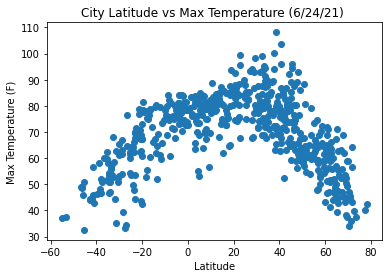

In [9]:
plt.scatter(city_info_df["Lat"],city_info_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (6/24/21) ")
plt.show()

In [10]:
# The temperatures are highiest at 40 degrees of latitude as opposed to 0 where the equater is.

## Latitude vs. Humidity Plot

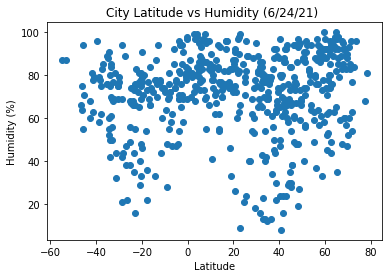

In [11]:
plt.scatter(city_info_df["Lat"],city_info_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (6/24/21) ")
plt.show()

In [12]:
# latitudes 0 to 60 degrees latitude have the highest density of high humidity.

## Latitude vs. Cloudiness Plot

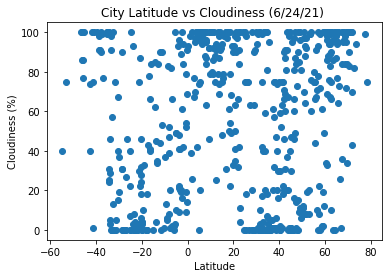

In [13]:
plt.scatter(city_info_df["Lat"],city_info_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (6/24/21) ")
plt.show()

In [14]:
#Cloudiness is evenly distributed across the latitudes.

## Latitude vs. Wind Speed Plot

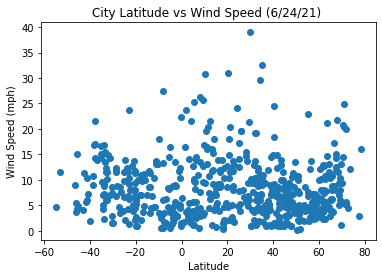

In [15]:
plt.scatter(city_info_df["Lat"],city_info_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (6/24/21) ")
plt.show()

In [16]:
# 20 degrees latitude has the highest recorded windspeed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
northern_hemisphere_df = city_info_df.loc[city_info_df['Lat'] >= 0]
southern_hemisphere_df = city_info_df.loc[city_info_df['Lat'] <= 0]

The r-value is: -0.6314836368110538


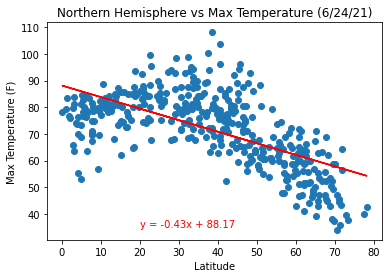

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(20,35), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere vs Max Temperature (6/24/21)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7950590653911968


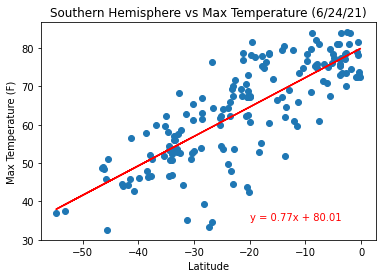

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-20,35), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere vs Max Temperature (6/24/21)")
plt.show()

In [20]:
# As cities approach the eqauter thier temperatures increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.03353959212424816


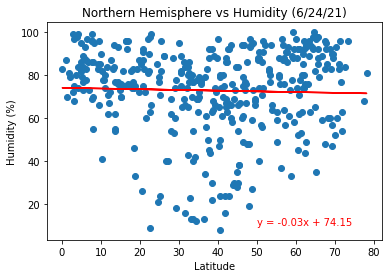

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere vs Humidity (6/24/21)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07468857581854363


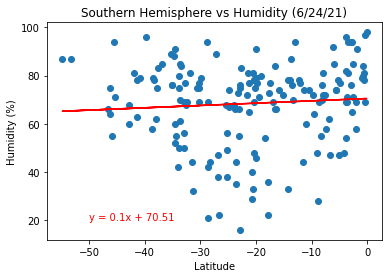

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,20), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere vs Humidity (6/24/21)")
plt.show()

In [23]:
#Humidity is not abile to be predicted.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.07068501138270784


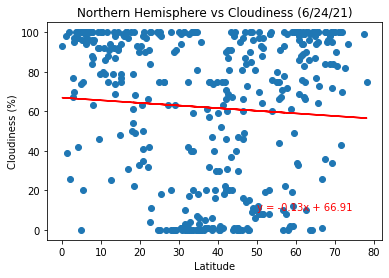

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere vs Cloudiness (6/24/21)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.20716112427599206


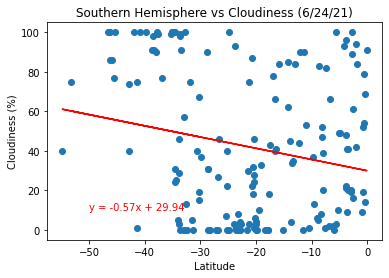

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere vs Cloudiness (6/24/21)")
plt.show()

In [26]:
# The southern hemisphere is less cloudy than the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09863820834712787


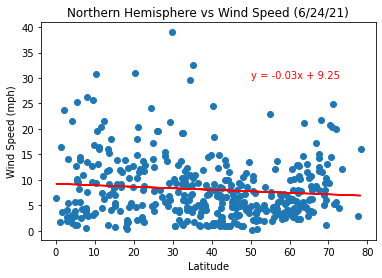

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,30), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere vs Wind Speed (6/24/21)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19575348089841163


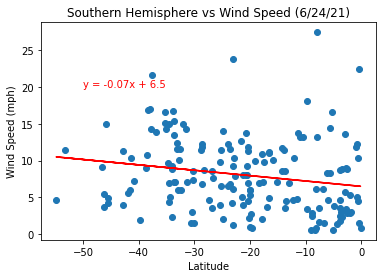

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,20), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere vs Wind Speed (6/24/21)")
plt.show()

In [29]:
#The southern hemisphere is less windy than the northern hemisphere.